<a href="https://colab.research.google.com/github/mukaseevru/ds-school/blob/main/final_project/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LSTM для задачи Регрессии

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(21)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [4]:
views = pd.read_csv('drive/MyDrive/Colab Notebooks/sber/news/data/views.csv')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   10941428  121 non-null    int64
 1   10941427  121 non-null    int64
 2   10941426  121 non-null    int64
 3   10941425  121 non-null    int64
 4   10941422  121 non-null    int64
 5   10941421  121 non-null    int64
 6   10941419  121 non-null    int64
 7   10941417  121 non-null    int64
 8   10941416  121 non-null    int64
 9   10941415  121 non-null    int64
dtypes: int64(10)
memory usage: 9.6 KB


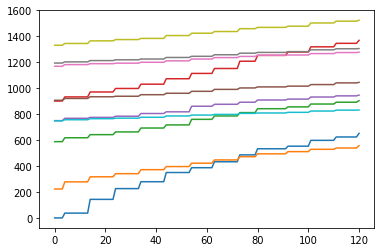

In [5]:
plt.plot(views)
plt.show()

In [6]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
dataset

array([[  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [433.],
       [433.],
       [433.],
       [43

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

84 37


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05674846]
 [0.05674846]
 [0.05674846]]
Train Y: 

[0.         0.         0.         0.05674846 0.05674846 0.05674846
 0.05674846]


In [12]:
print(trainX.shape, trainY.shape)

(82, 1) (82,)


In [13]:
print(testX.shape, testY.shape)

(35, 1) (35,)


In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
82/82 - 2s - loss: 0.2317
Epoch 2/100
82/82 - 0s - loss: 0.1556
Epoch 3/100
82/82 - 0s - loss: 0.1020
Epoch 4/100
82/82 - 0s - loss: 0.0663
Epoch 5/100
82/82 - 0s - loss: 0.0487
Epoch 6/100
82/82 - 0s - loss: 0.0418
Epoch 7/100
82/82 - 0s - loss: 0.0378
Epoch 8/100
82/82 - 0s - loss: 0.0344
Epoch 9/100
82/82 - 0s - loss: 0.0315
Epoch 10/100
82/82 - 0s - loss: 0.0289
Epoch 11/100
82/82 - 0s - loss: 0.0260
Epoch 12/100
82/82 - 0s - loss: 0.0228
Epoch 13/100
82/82 - 0s - loss: 0.0196
Epoch 14/100
82/82 - 0s - loss: 0.0161
Epoch 15/100
82/82 - 0s - loss: 0.0128
Epoch 16/100
82/82 - 0s - loss: 0.0095
Epoch 17/100
82/82 - 0s - loss: 0.0068
Epoch 18/100
82/82 - 0s - loss: 0.0047
Epoch 19/100
82/82 - 0s - loss: 0.0031
Epoch 20/100
82/82 - 0s - loss: 0.0022
Epoch 21/100
82/82 - 0s - loss: 0.0016
Epoch 22/100
82/82 - 0s - loss: 0.0013
Epoch 23/100
82/82 - 0s - loss: 0.0011
Epoch 24/100
82/82 - 0s - loss: 0.0010
Epoch 25/100
82/82 - 0s - loss: 9.9762e-04
Epoch 26/100
82/82 - 0s - loss

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.05 RMSE
Test Score: 18.90 RMSE


In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

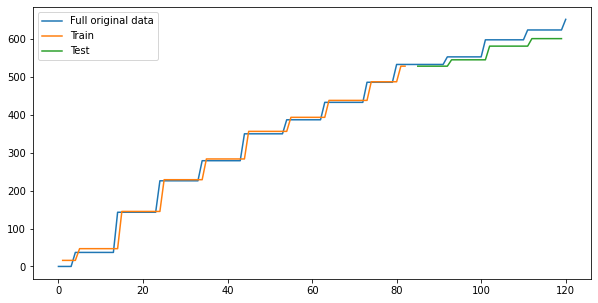

In [18]:
# plot baseline and predictions
plt.figure(figsize = (10,5))
plt.plot(scaler.inverse_transform(dataset), label = 'Full original data')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend()
plt.show()

# 2. LSTM для Регрессии с использованием оконного метода

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
print('Train X: \n')
print(trainX[:])
print('Train Y: \n')
print(trainY[:])

Train X: 

[[[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.05674846]]

 [[0.         0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.21932516]]

 [[0.05674846 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.34662575]]

 [[0.21932516 0.34662575 0.34662575]]

 [[0.34662575 0.34662575 0.34662575]]

 [[0.34662575 

In [22]:
print('Test X: \n')
print(testX[:])
print('Test Y: \n')
print(testY[:])

Test X: 

[[[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8481595]]

 [[0.8174846 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.9171779]]

 [[0.8481595 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9570552]]

 [[0.9171779 0.9570552 0.9570552]]

 [[0.9570552 0.957

In [23]:
print(trainX.shape, trainY.shape)

(80, 1, 3) (80,)


In [24]:
print(testX.shape, testY.shape)

(33, 1, 3) (33,)


Epoch 1/100
80/80 - 2s - loss: 0.2925
Epoch 2/100
80/80 - 0s - loss: 0.1852
Epoch 3/100
80/80 - 0s - loss: 0.1111
Epoch 4/100
80/80 - 0s - loss: 0.0624
Epoch 5/100
80/80 - 0s - loss: 0.0393
Epoch 6/100
80/80 - 0s - loss: 0.0312
Epoch 7/100
80/80 - 0s - loss: 0.0261
Epoch 8/100
80/80 - 0s - loss: 0.0224
Epoch 9/100
80/80 - 0s - loss: 0.0188
Epoch 10/100
80/80 - 0s - loss: 0.0157
Epoch 11/100
80/80 - 0s - loss: 0.0129
Epoch 12/100
80/80 - 0s - loss: 0.0104
Epoch 13/100
80/80 - 0s - loss: 0.0083
Epoch 14/100
80/80 - 0s - loss: 0.0066
Epoch 15/100
80/80 - 0s - loss: 0.0052
Epoch 16/100
80/80 - 0s - loss: 0.0041
Epoch 17/100
80/80 - 0s - loss: 0.0032
Epoch 18/100
80/80 - 0s - loss: 0.0026
Epoch 19/100
80/80 - 0s - loss: 0.0021
Epoch 20/100
80/80 - 0s - loss: 0.0018
Epoch 21/100
80/80 - 0s - loss: 0.0016
Epoch 22/100
80/80 - 0s - loss: 0.0015
Epoch 23/100
80/80 - 0s - loss: 0.0014
Epoch 24/100
80/80 - 0s - loss: 0.0014
Epoch 25/100
80/80 - 0s - loss: 0.0014
Epoch 26/100
80/80 - 0s - loss: 0.

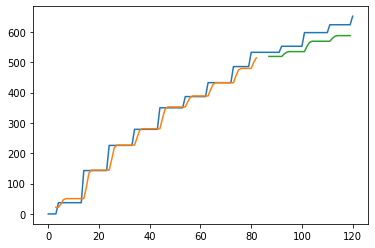

In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 3. LSTM для регрессии с  Time Steps

In [27]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [28]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.05674846]]

 [[0.        ]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]]
Train Y: 

[0.         0.05674846 0.05674846 0.05674846 0.05674846 0.05674846
 0.05674846]


In [29]:
print(trainX.shape, trainY.shape)

(77, 3, 1) (77,)


In [30]:
print(testX.shape, testY.shape)

(36, 3, 1) (36,)


In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Epoch 1/100
77/77 - 2s - loss: 0.3365
Epoch 2/100
77/77 - 0s - loss: 0.1803
Epoch 3/100
77/77 - 0s - loss: 0.1002
Epoch 4/100
77/77 - 0s - loss: 0.0631
Epoch 5/100
77/77 - 0s - loss: 0.0475
Epoch 6/100
77/77 - 0s - loss: 0.0406
Epoch 7/100
77/77 - 0s - loss: 0.0357
Epoch 8/100
77/77 - 0s - loss: 0.0316
Epoch 9/100
77/77 - 0s - loss: 0.0275
Epoch 10/100
77/77 - 0s - loss: 0.0237
Epoch 11/100
77/77 - 0s - loss: 0.0200
Epoch 12/100
77/77 - 0s - loss: 0.0165
Epoch 13/100
77/77 - 0s - loss: 0.0135
Epoch 14/100
77/77 - 0s - loss: 0.0106
Epoch 15/100
77/77 - 0s - loss: 0.0082
Epoch 16/100
77/77 - 0s - loss: 0.0063
Epoch 17/100
77/77 - 0s - loss: 0.0047
Epoch 18/100
77/77 - 0s - loss: 0.0036
Epoch 19/100
77/77 - 0s - loss: 0.0028
Epoch 20/100
77/77 - 0s - loss: 0.0022
Epoch 21/100
77/77 - 0s - loss: 0.0020
Epoch 22/100
77/77 - 0s - loss: 0.0018
Epoch 23/100
77/77 - 0s - loss: 0.0017
Epoch 24/100
77/77 - 0s - loss: 0.0016
Epoch 25/100
77/77 - 0s - loss: 0.0016
Epoch 26/100
77/77 - 0s - loss: 0.

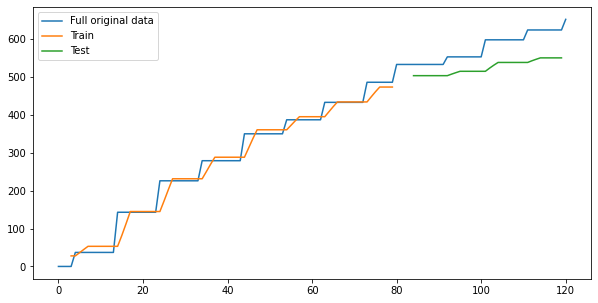

In [32]:
# plot baseline and predictions
plt.figure(figsize = (10,5))
plt.plot(scaler.inverse_transform(dataset), label = 'Full original data')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend()
plt.show()